Load libraries

In [1]:
#imports
from __future__ import print_function
import pyart
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
from time import time
import os
from netCDF4 import num2date, date2num


Load odimh5 file

In [2]:
fn  = 'data/201512152330Kurnell.h5'
#Since the names in the HDF5 file are non-standard we use file_field_names = True
myradar = pyart.aux_io.read_odim_h5(fn, file_field_names=True) 

Estimate nyquist for radar since folding is present. H5 file lacks this data

In [4]:
#No nyquist in file so take a guess
print(myradar.fields['VRADH']['data'].max(), myradar.fields['VRADH']['data'].min())

26.4807 -26.4806


Unfold Velocity

In [5]:

myradar.fields['DBZH']['standard_name'] = 'Reflectivity'
myradar.fields['DBZH']['units'] = 'dBZ'
myradar.fields['DBZH']['long_name'] = 'Radar Reflectivity Factor'
myradar.fields['VRADH']['standard_name'] = 'Velocity'
myradar.fields['VRADH']['units'] = 'm/s'
myradar.fields['VRADH']['long_name'] = 'Radial Velocity of Scatterers'

gatefilter = pyart.correct.GateFilter(myradar)
gatefilter.exclude_masked('DBZH')
corr_vel = pyart.correct.dealias_region_based(
    myradar, vel_field='VRADH', keep_original=False, gatefilter = gatefilter, nyquist_vel=26.6)
myradar.add_field('corrected_velocity', corr_vel, True)


Plot up uncorrected Velocity

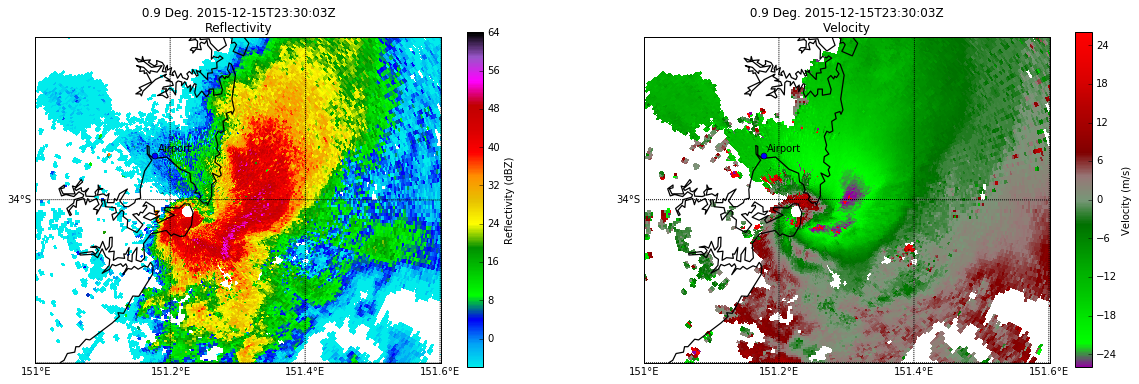

In [6]:
lat_lines = np.arange(-33,-36,-.2)
lon_lines = np.arange(149, 153, .2)
my_display = pyart.graph.RadarMapDisplay(myradar)
tilt = 6
f = plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
my_display.plot_ppi_map('DBZH', tilt, vmin=-6, vmax=64.0, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = -33.8, min_lat =-34.2, min_lon = 151.0, max_lon = 151.6,
                       cmap = pyart.graph.cm.NWSRef)
my_display.plot_point( 151.1772, -33.9461,
               label_text = 'Airport', 
               label_offset=[.005,.005], symbol = 'bo' )

ax = plt.gca()
plt.subplot(1,2,2)
my_display.plot_ppi_map('VRADH', tilt, vmin=-26., vmax=26., 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = -33.8, min_lat =-34.2, min_lon = 151.0, max_lon = 151.6,
                       cmap = pyart.graph.cm.NWSVel)
my_display.plot_point( 151.1772, -33.9461, 
               label_text = 'Airport', 
               label_offset=[.005,.005], symbol = 'bo' )

ax = plt.gca()


Plot up corrected velocity

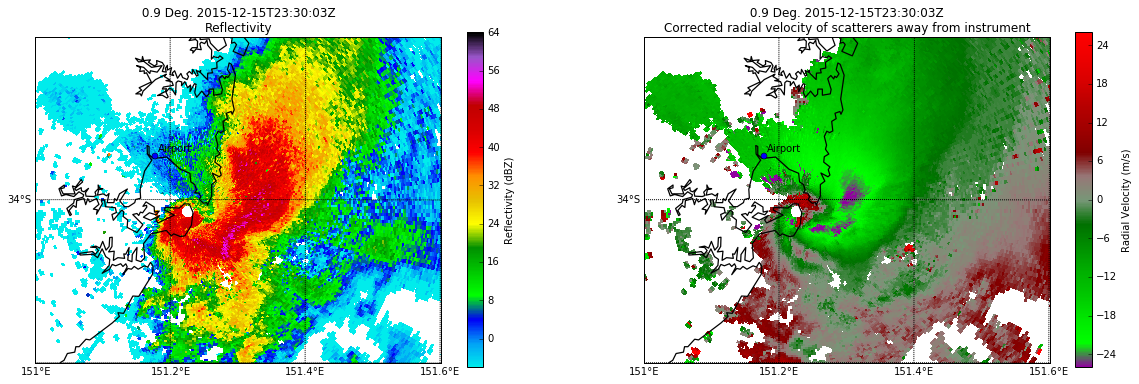

In [7]:
lat_lines = np.arange(-33,-36,-.2)
lon_lines = np.arange(149, 153, .2)
my_display = pyart.graph.RadarMapDisplay(myradar)
tilt = 6
f = plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
my_display.plot_ppi_map('DBZH', tilt, vmin=-6, vmax=64.0, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = -33.8, min_lat =-34.2, min_lon = 151.0, max_lon = 151.6,
                       cmap = pyart.graph.cm.NWSRef)
my_display.plot_point( 151.1772, -33.9461,
               label_text = 'Airport', 
               label_offset=[.005,.005], symbol = 'bo' )

ax = plt.gca()
plt.subplot(1,2,2)
my_display.plot_ppi_map('corrected_velocity', tilt, vmin=-26., vmax=26., 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = -33.8, min_lat =-34.2, min_lon = 151.0, max_lon = 151.6,
                       cmap = pyart.graph.cm.NWSVel, colorbar_label = 'Radial Velocity (m/s)')
my_display.plot_point( 151.1772, -33.9461, 
               label_text = 'Airport', 
               label_offset=[.005,.005], symbol = 'bo' )

ax = plt.gca()
